In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
tf.__version__

'2.12.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/homer_bart_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

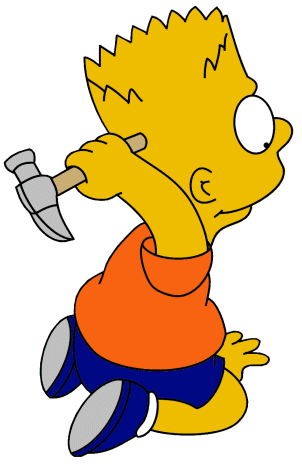

In [4]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart104.bmp')

In [5]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)

In [6]:
train_dataset = training_generator.flow_from_directory('/content/homer_bart_2/training_set',
                                                        target_size = (64, 64),
                                                        batch_size = 8,
                                                        class_mode = 'categorical',
                                                       shuffle = True)

Found 215 images belonging to 2 classes.


In [7]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [9]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/homer_bart_2/test_set',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 54 images belonging to 2 classes.


In [10]:
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))


network.add(Flatten())

network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

In [11]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [12]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [13]:
history = network.fit_generator(train_dataset, epochs=50, validation_data=test_dataset)

Epoch 1/50


<ipython-input-13-70460a0dc6fc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset, epochs=50, validation_data=test_dataset)


27/27 [==============================] - 15s 81ms/step - loss: 0.6706 - accuracy: 0.5860 - val_loss: 0.5563 - val_accuracy: 0.7778
Epoch 2/50
27/27 [==============================] - 1s 32ms/step - loss: 0.5598 - accuracy: 0.7488 - val_loss: 0.5229 - val_accuracy: 0.7593
Epoch 3/50
27/27 [==============================] - 1s 34ms/step - loss: 0.4597 - accuracy: 0.7907 - val_loss: 0.8569 - val_accuracy: 0.7037
Epoch 4/50
27/27 [==============================] - 1s 29ms/step - loss: 0.3976 - accuracy: 0.8140 - val_loss: 0.3568 - val_accuracy: 0.8704
Epoch 5/50
27/27 [==============================] - 1s 32ms/step - loss: 0.4059 - accuracy: 0.7953 - val_loss: 0.4010 - val_accuracy: 0.8519
Epoch 6/50
27/27 [==============================] - 1s 33ms/step - loss: 0.4821 - accuracy: 0.7535 - val_loss: 0.5180 - val_accuracy: 0.7593
Epoch 7/50
27/27 [==============================] - 1s 28ms/step - loss: 0.3763 - accuracy: 0.8326 - val_loss: 0.3705 - val_accuracy: 0.7778
Epoch 8/50
27/27 [=====

In [14]:
predictions = network.predict(test_dataset)
predictions

54/54 [==============================] - 0s 3ms/step


array([[1.0000000e+00, 5.8529252e-29],
       [1.0000000e+00, 8.2625272e-19],
       [9.9825436e-01, 1.7455891e-03],
       [1.0000000e+00, 1.8586146e-22],
       [1.0000000e+00, 6.2445766e-25],
       [1.0000000e+00, 6.7912117e-17],
       [1.0000000e+00, 3.4454461e-14],
       [9.9999917e-01, 8.5590335e-07],
       [1.3990444e-02, 9.8600948e-01],
       [9.8860711e-01, 1.1392935e-02],
       [9.9999774e-01, 2.2936388e-06],
       [1.0000000e+00, 5.0675744e-18],
       [9.9610007e-01, 3.8999282e-03],
       [9.9964094e-01, 3.5906734e-04],
       [9.9999177e-01, 8.2673769e-06],
       [1.0000000e+00, 2.2121140e-16],
       [9.9999917e-01, 8.6649396e-07],
       [1.0000000e+00, 1.4521646e-21],
       [1.7685096e-01, 8.2314903e-01],
       [1.0000000e+00, 1.5182805e-25],
       [1.9247855e-06, 9.9999809e-01],
       [1.0000000e+00, 8.5316195e-31],
       [1.0000000e+00, 2.6967516e-08],
       [2.1339925e-02, 9.7866005e-01],
       [1.0000000e+00, 1.2121079e-13],
       [1.0000000e+00, 3.

In [15]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.8703703703703703

In [18]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

<Axes: >

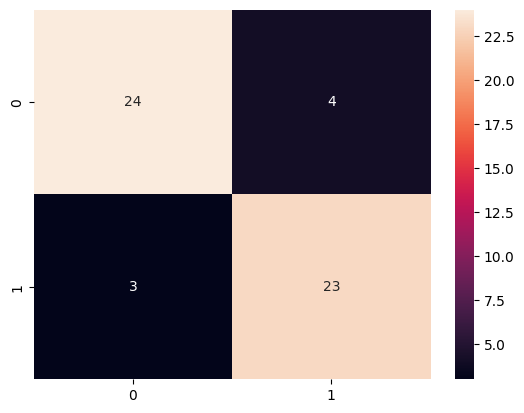

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.85      0.88      0.87        26

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

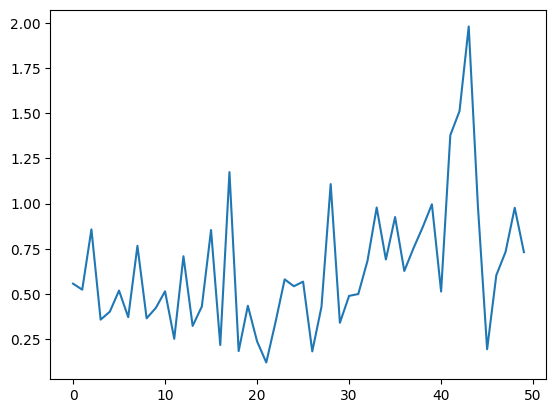

In [22]:
plt.plot(history.history['val_loss']);

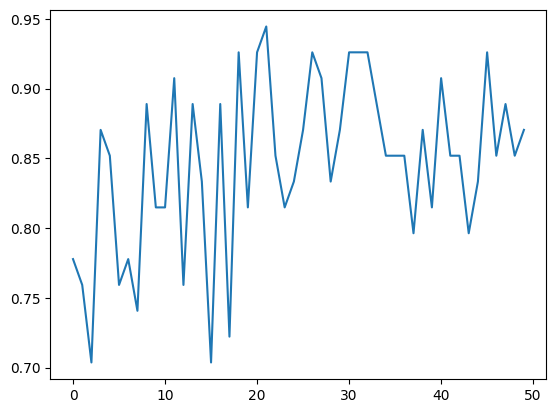

In [23]:
plt.plot(history.history['val_accuracy']);